# Random Forest - Classification PostClass

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.




Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

**Summary:**<br>
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* **penguins_size.csv:** Simplified data from original penguin data sets. Contains variables:

    * **species:** penguin species (Chinstrap, Adélie, or Gentoo)
    * **culmen_length_mm:** culmen length (mm)
    * **culmen_depth_mm:** culmen depth (mm)
    * **flipper_length_mm:** flipper length (mm)
    * **body_mass_g:** body mass (g)
    * **island:** island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * **sex:** penguin sex

* **(Not used) penguins_lter.csv:** Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist.**

## Imports

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option("display.float_format", lambda x : "%.3f" % x)

In [15]:
df = pd.read_csv("penguins_size.csv")

In [16]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100,18.700,181.000,3750.000,MALE
1,Adelie,Torgersen,39.500,17.400,186.000,3800.000,FEMALE
2,Adelie,Torgersen,40.300,18.000,195.000,3250.000,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.700,19.300,193.000,3450.000,FEMALE


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [22]:
df.dropna().shape[0]

334

In [7]:
df.shape

(344, 7)

In [24]:
(344 - 334) / 344
# Sadece % 3 lük bir null değer var. Bunları doldurmak yerine atmayı tercih ediyorum.

0.029069767441860465

In [26]:
df.dropna(inplace=True)

In [27]:
df.shape

(334, 7)

## Exploratory Data Analysis and Visualization

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [29]:
df.describe()
# Extreme  değer yok gözüküyor.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000,334.000,334.000,334.000
mean,43.994,17.160,201.015,4209.057
std,5.461,1.968,14.022,804.836
min,32.100,13.100,172.000,2700.000
25%,39.500,15.600,190.000,3550.000
50%,44.500,17.300,197.000,4050.000
75%,48.575,18.700,213.000,4793.750
max,59.600,21.500,231.000,6300.000


In [31]:
for feature in df.columns:
    if df[feature].dtype == "object":
        print(df[feature].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' '.']


In [33]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.500,15.700,217.000,4875.000,.


In [34]:
df.drop(index=336, inplace=True)

In [35]:
df.shape

(333, 7)

In [37]:
df["species"].value_counts()
# Burada türler imbalance bir şekilde dağılmış diyemeyiz ancak çok balance bir dağılım da yok.

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

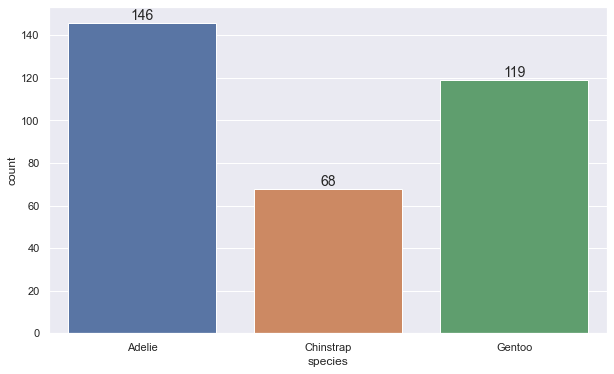

In [41]:
ax = sns.countplot(x="species", data = df)
ax.bar_label(ax.containers[0], fontsize=14);

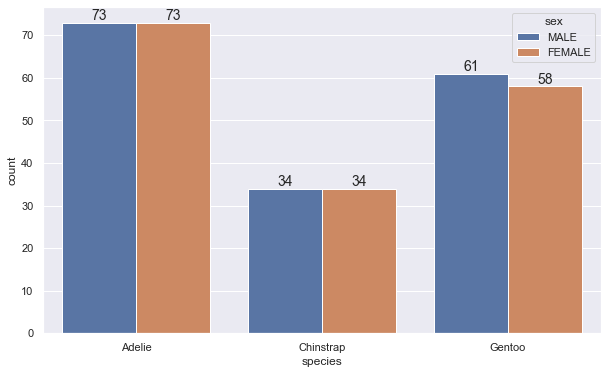

In [42]:
ax = sns.countplot(x="species", data = df, hue = "sex")
for p in ax.containers:
    ax.bar_label(p, fontsize=14)
    
    # Cinsiyetler eşit dağılmış.

<Figure size 864x432 with 0 Axes>

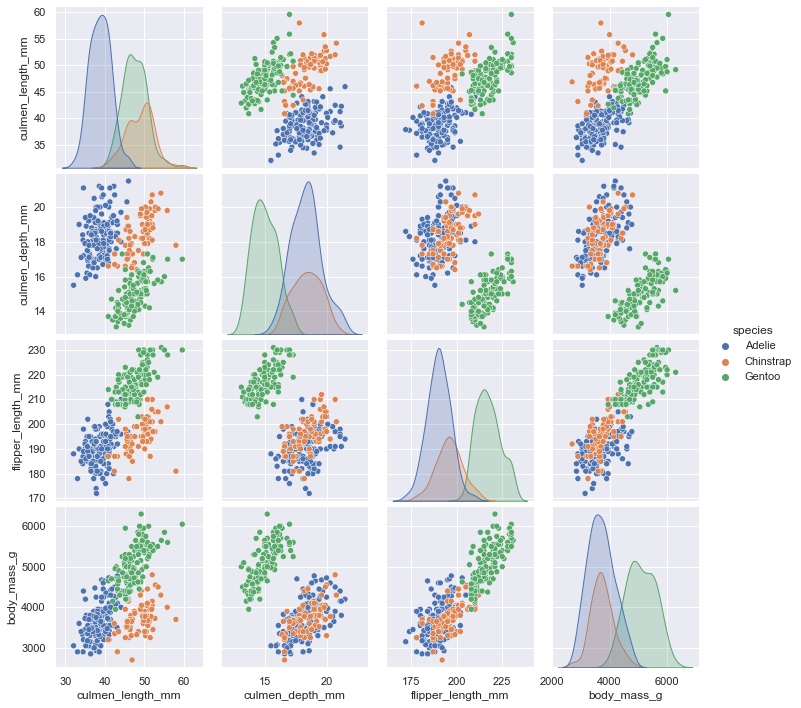

In [43]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, hue = "species");

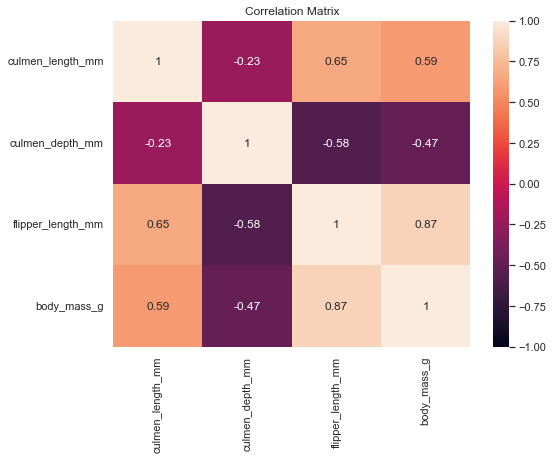

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, vmin=-1)
plt.title("Correlation Matrix");

In [48]:
# Burada flipper_length ile body_mass arasında yüksek korelasyon var yani datada collineraity var .
# Ancak Random Forest bununla başa çıkabiliyor. Zaten distance-based bir model değil.

## OrdinalEncoder

https://bookdown.org/max/FES/categorical-trees.html

https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

## Modeling with Pipeline

## Train | Test Split

In [49]:
X = df.drop(columns="species")
y = df["species"]

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

# Burada dağılım eşit olmadığı için stratify kullanmayı tercih ettim.

In [54]:
X_train.head(2)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
285,Biscoe,49.800,16.800,230.000,5700.000,MALE
183,Dream,54.200,20.800,201.000,4300.000,MALE


In [56]:
X_test.head(2)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
89,Dream,38.900,18.800,190.000,3600.000,FEMALE
143,Dream,40.700,17.000,190.000,3725.000,MALE


In [58]:
cat = X_train.select_dtypes("object").columns
cat

Index(['island', 'sex'], dtype='object')

In [65]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder = "passthrough")

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=101))]

pipe_model = Pipeline(steps = operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF_model', RandomForestClassifier(random_state=101))])

## Model Performance on Classification Tasks

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score,f1_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Random Forest

In [68]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

In [69]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [70]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[117   0   0]
 [  0  54   0]
 [  0   0  95]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



In [74]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, 
                        scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# Burada micro score'ların aynı sonucu verdiğini göstermek için fonksiyona dahil ettik...
# Cross validation sonrası default değerler ile accuracy score'um 99.3 çıktı.
# Yukarıda default değerler ile test ve train score'larım 1 çıktı ve cross_val sonrası 99.3 çıktı. 
# GridSearch ihtiyacı kalmadı gibi ama deneyelim.

test_accuracy          0.993
test_precision_micro   0.993
test_recall_micro      0.993
test_f1_micro          0.993
dtype: float64

## GridSearch

In [75]:
from sklearn.model_selection import GridSearchCV

In [84]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=101))]
model = Pipeline(steps = operations)

In [85]:
param_grid = {
    "RF_model__n_estimators" : [64, 128, 250],
    "RF_model__max_depth" : [4, 5, 6],
    "RF_model__min_samples_leaf" : [1, 2, 3],
    "RF_model__min_samples_split" : [2, 3, 5],
    "RF_model__max_features" : ["auto", 3, 6]
}

In [95]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=5,
                          n_jobs = -1)

In [96]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['island', 'sex'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [4, 5, 6],
                         'RF_model__max_features': ['auto', 3, 6],
                         'RF_model__min_samples_leaf': [1, 2, 3],
                         'RF_model__min_samples_split': [2, 3, 5],
                         'RF_model__n_estimators': [64, 128, 250]},
             scoring='accuracy')

In [97]:
grid_model.best_params_

{'RF_model__max_depth': 6,
 'RF_model__max_features': 'auto',
 'RF_model__min_samples_leaf': 1,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 250}

In [99]:
grid_model.best_score_
# Burada best score R2

0.992522711390636

In [102]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=101, max_depth=6,
                                                                                    max_features="auto",
                                                                                    min_samples_leaf=1,
                                                                                    min_samples_split=2,
                                                                                    n_estimators = 250))]

model = Pipeline(steps=operations)

In [103]:
model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(max_depth=6, max_features='auto',
                                        n_estimators=250, random_state=101))])

In [104]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[117   0   0]
 [  0  54   0]
 [  0   0  95]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



In [106]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=101, max_depth=6,
                                                                                    max_features="auto",
                                                                                    min_samples_leaf=1,
                                                                                    min_samples_split=2,
                                                                                    n_estimators = 250))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, 
                        scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.989
test_precision_micro   0.989
test_recall_micro      0.989
test_f1_micro          0.989
dtype: float64

In [108]:
# Gridsearch yapınca da score çok değişmedi...

## Evaluating ROC Curves and AUC

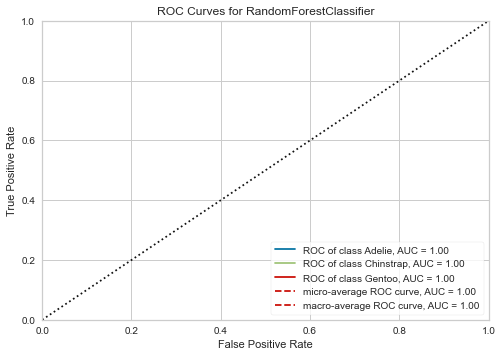

In [109]:
from yellowbrick.classifier import ROCAUC

model = pipe_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

### RF Model Feature Importance

In [111]:
pipe_model["RF_model"].feature_importances_

array([0.1090312 , 0.01036703, 0.35052176, 0.15568431, 0.25091596,
       0.12347973])

In [112]:
features = list(X_train.select_dtypes("object").columns) + list(X_train.select_dtypes("number").columns)
features

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [117]:
df_f_i = pd.DataFrame(data = pipe_model["RF_model"].feature_importances_, 
                      index = features,
                      columns=["Feature Importance"])
df_f_i.sort_values(by="Feature Importance", ascending=False, inplace=True)
df_f_i

,Feature Importance
culmen_length_mm,0.351
flipper_length_mm,0.251
culmen_depth_mm,0.156
body_mass_g,0.123
island,0.109
sex,0.010


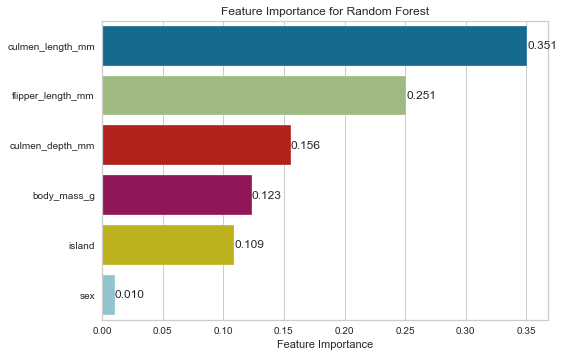

In [119]:
ax = sns.barplot(x = df_f_i["Feature Importance"], y= df_f_i.index)

for i in ax.containers:
    ax.bar_label(i, fmt = "%.3f")
    
plt.title("Feature Importance for Random Forest")
plt.show()

## Understanding Hyperparameters

In [120]:
from sklearn.tree import plot_tree

def report_model(model, number_of_tree):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree], feature_names=features, #features_names=X.columns
          class_names=df.species.unique(),
          filled = True,
          fontsize = 8);

In [121]:
RF_model = RandomForestClassifier(max_samples=0.5) #The sub-sample size is controlled with the max_samples parameter
operations = [("OrdinalEncoder", column_trans), ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations) # pruned_tree = RandomForestClassifier(max_samples=0.5)

pruned_tree.fit(X_train,y_train)

# max_samples : If bootstrap is True, the number of samples to draw from X to train each base estimator.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF_model', RandomForestClassifier(max_samples=0.5))])



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Train Set
[[117   0   0]
 [  1  53   0]
 [  0   0  95]]


              precision    recall  f1-score   support

      Adelie       0.99      1.00      1.00       117
   Chinstrap       1.00      0.98      0.99        54
      Gentoo       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      0.99      1.00       266
weighted avg       1.00      1.00      1.00       266



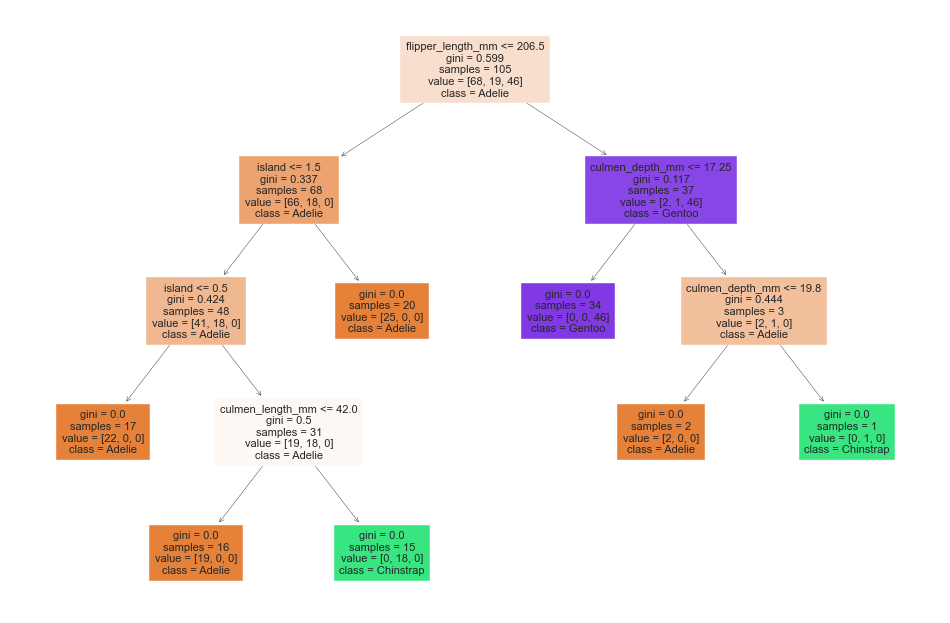

In [122]:
report_model(pruned_tree, 50)

## Final Model and Prediction

In [124]:
# Final model'i default değerlerler oluşturmaya karar verdim çünkü arada puan farkı yok denecek kadar az.

In [123]:
X = df.drop(columns=["species"])
y = df['species']

In [125]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline


operations = [("transformer", column_trans), ("RF", RandomForestClassifier(random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF', RandomForestClassifier(random_state=101))])

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,333.000,43.993,5.469,32.100,39.500,44.500,48.600,59.600
culmen_depth_mm,333.000,17.165,1.969,13.100,15.600,17.300,18.700,21.500
flipper_length_mm,333.000,200.967,14.016,172.000,190.000,197.000,213.000,231.000
body_mass_g,333.000,4207.057,805.216,2700.000,3550.000,4050.000,4775.000,6300.000


In [127]:
observations = {"island": ["Torgersen", "Biscoe"], "culmen_length_mm":[39, 48], "culmen_depth_mm":[18, 14],
               "flipper_length_mm":[180, 213], "body_mass_g":[3700, 4800], "sex":["MALE", "FEMALE"]}

obs = pd.DataFrame(observations)
obs

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39,18,180,3700,MALE
1,Biscoe,48,14,213,4800,FEMALE


In [128]:
pipe_model.predict(obs)

array(['Adelie', 'Gentoo'], dtype=object)